In [1]:
!pip install pyarrow
!pip install keras
!pip install tsfresh
!pip install sklearn
!pip install Cython
!pip install tslearn

  Using cached https://files.pythonhosted.org/packages/0e/ee/71955f715d65afa1fc319b33dfe1976cd09a1a349af7756b232dbae85409/pyarrow-0.13.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl
    100% |████████████████████████████████| 122kB 4.3MB/s ta 0:00:01   17% |█████▌                          | 20kB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 9.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /content/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da28

In [2]:
import pandas as pd
import matplotlib as mt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import *
from keras.models import Model

from sklearn.model_selection import train_test_split 
from keras import backend as K 
from keras import optimizers 
from keras.callbacks import  *
import pyarrow.parquet as pq
import tensorflow as tf

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train1=pq.read_pandas('train1Scaled.parquet').to_pandas()

In [4]:
train2=train1.T

In [5]:
del train1

In [6]:
meta1=pd.read_csv("metadata_train.csv")
df1=meta1.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train2,df1, test_size=0.33, random_state=5)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [9]:
modelrf = RandomForestClassifier(n_estimators=500, random_state=0)

In [10]:
#modelrf is a sample model

In [11]:
modelrf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
pred5 = modelrf.predict(X_test)
modelrf.score(X_test,y_test)

0.9377391304347826

In [29]:
confusionNoCV = confusion_matrix(y_test, pred5)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


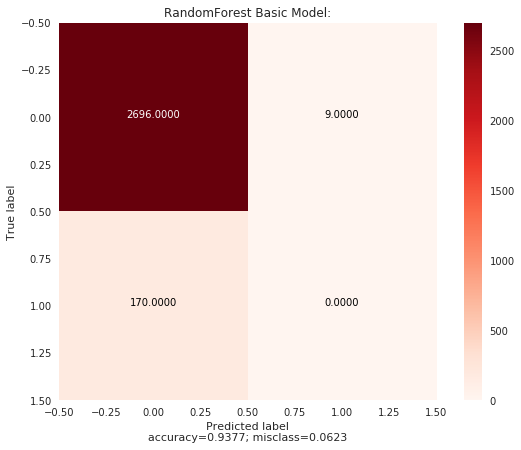

In [37]:
import itertools

accuracy = np.trace(confusionNoCV) / float(np.sum(confusionNoCV))
misclass = 1 - accuracy

plt.figure(figsize=(8, 6))
plt.imshow(confusionNoCV, interpolation='nearest', cmap='Reds')
plt.title("RandomForest Basic Model:")
plt.colorbar()

# tick_marks = np.arange(len(target_names))
# plt.xticks(tick_marks, target_names, rotation=45)
# plt.yticks(tick_marks, target_names)

thresh = confusionNoCV.max() / 1.5 #if normalize else cm.max() / 2
for i, j in itertools.product(range(confusionNoCV.shape[0]), range(confusionNoCV.shape[1])):

#   if normalize:
    plt.text(j, i, "{:0.4f}".format(confusionNoCV[i, j]),
                     horizontalalignment="center",
                     color="white" if confusionNoCV[i, j] > thresh else "black")

plt.grid(b=None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()

In [13]:
#next we will do cross validation

In [14]:
# random forest with cross validation, we are making a grid of paraters
n_estimators=[2,4,8,16,24,48,80,100,200,300,400,500,750,1000]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 4,6,8]
max_depth= [5,10,15,20,25,30,40,50,60,70,80]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               }

rfcv= RandomForestClassifier()

In [15]:
rf_rcv = RandomizedSearchCV(estimator = rfcv, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [17]:
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [18]:
rf_rcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_features=auto, n_estimators=750, min_samples_split=2, max_depth=40 
[CV] max_features=auto, n_estimators=750, min_samples_split=2, max_depth=40 
[CV] max_features=auto, n_estimators=750, min_samples_split=2, max_depth=40 
[CV] max_features=sqrt, n_estimators=1000, min_samples_split=8, max_depth=25 
[CV]  max_features=auto, n_estimators=750, min_samples_split=2, max_depth=40, total=132.6min
[CV] max_features=sqrt, n_estimators=1000, min_samples_split=8, max_depth=25 
[CV]  max_features=auto, n_estimators=750, min_samples_split=2, max_depth=40, total=134.5min
[CV] max_features=sqrt, n_estimators=1000, min_samples_split=8, max_depth=25 
[CV]  max_features=auto, n_estimators=750, min_samples_split=2, max_depth=40, total=141.7min
[CV] max_features=sqrt, n_estimators=750, min_samples_split=6, max_depth=80 
[CV]  max_features=sqrt, n_estimators=1000, min_samples_split=8, max_depth=25, total=163.6min
[CV] max_features=sqrt, 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 650.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'n_estimators': [2, 4, 8, 16, 24, 48, 80, 100, 200, 300, 400, 500, 750, 1000], 'min_samples_split': [2, 4, 6, 8], 'max_depth': [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [19]:
rf_rcv.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 500}

In [20]:
rf_rcv.best_score_

0.9388384444063731

In [24]:
pred4 = rf_rcv.predict(X_test)

In [22]:
rf_rcv.score(X_test,y_test)

0.9408695652173913

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [30]:
cm = confusion_matrix(y_test, pred4)

In [31]:
print(cm)

[[2705    0]
 [ 170    0]]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


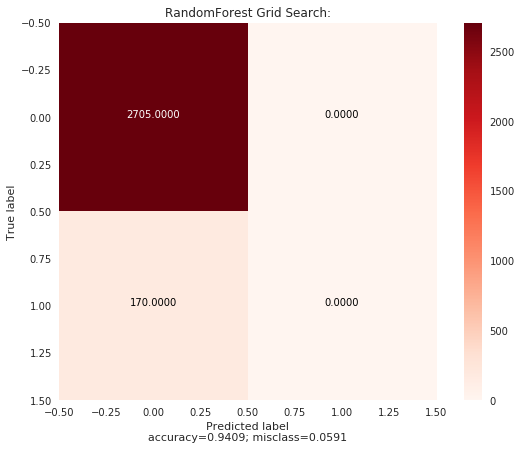

In [34]:
import itertools

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title("RandomForest Grid Search:")
plt.colorbar()

# tick_marks = np.arange(len(target_names))
# plt.xticks(tick_marks, target_names, rotation=45)
# plt.yticks(tick_marks, target_names)

thresh = cm.max() / 1.5 #if normalize else cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

#   if normalize:
    plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
#   else:
#     plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")

plt.grid(b=None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()

In [38]:
!gsutil cp 'vsbRandomForest11.ipynbv' gs://pitt_ml_pd



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

CommandException: No URLs matched: vsbRandomForest11.ipynbv
